In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Load the dataset and display the first 5 rows.
df = pd.read_csv(r"/content/ai_assistant_usage_student_life.csv")
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [ ]:
#Check the dataset shape (rows, columns).
rows, columns = df.shape
print("Rows:", rows, "Columns:", columns)

Rows: 10000 Columns: 11


In [ ]:
#Display column names and their data types
df.dtypes

,0
SessionID,object
StudentLevel,object
Discipline,object
SessionDate,object
SessionLengthMin,float64
TotalPrompts,int64
TaskType,object
AI_AssistanceLevel,int64
FinalOutcome,object
UsedAgain,bool


In [ ]:
#Check for missing values in each column.
missing_val = df.isnull().sum()
missing_val

,0
SessionID,0
StudentLevel,0
Discipline,0
SessionDate,0
SessionLengthMin,0
TotalPrompts,0
TaskType,0
AI_AssistanceLevel,0
FinalOutcome,0
UsedAgain,0


In [ ]:
#Show summary statistics for SessionLengthMin and TotalPrompts.
stats = df[['SessionLengthMin','TotalPrompts']].describe()
print(stats)


       SessionLengthMin  TotalPrompts
count      10000.000000  10000.000000
mean          19.846467      5.607500
std           13.897302      4.648764
min            0.030000      1.000000
25%            9.630000      2.000000
50%           16.650000      4.000000
75%           26.670000      8.000000
max          110.810000     39.000000


In [ ]:
#Find the number of unique values in StudentLevel, Discipline, and TaskType.
df[['StudentLevel', 'Discipline', 'TaskType']].nunique()

,0
StudentLevel,3
Discipline,7
TaskType,6


In [ ]:
#Which TaskType is the most common?
most_common_Tasktype = df['TaskType'].mode()[0]
most_common_count = df['TaskType'].value_counts()[0]
print(most_common_Tasktype, most_common_count)

Writing 3101


/tmp/ipython-input-3042432369.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  most_common_count = df['TaskType'].value_counts()[0]


In [ ]:
#Calculate the average SessionLengthMin for each StudentLevel.
avg_lengthMin = df.groupby('StudentLevel')['SessionLengthMin'].mean()
avg_lengthMin

,SessionLengthMin
StudentLevel,
Graduate,20.252236
High School,20.023740
Undergraduate,19.650943


#### Part B: Visualization


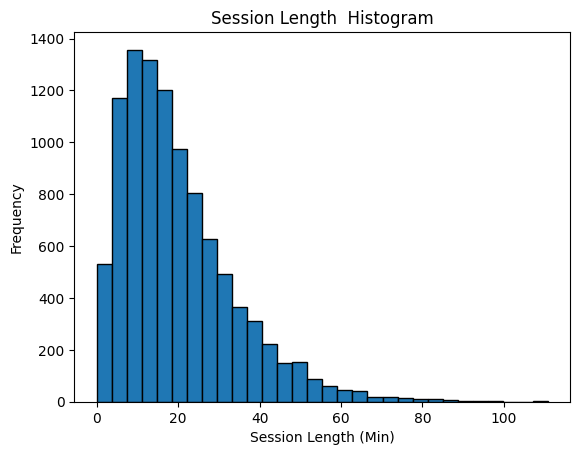

In [ ]:
#Plot a histogram of SessionLengthMin.
plt.Figure(figsize=(10,6))
plt.hist(df['SessionLengthMin'], bins=30, edgecolor='black')
plt.title("Session Length  Histogram")
plt.xlabel('Session Length (Min)')
plt.ylabel('Frequency')
plt.show()

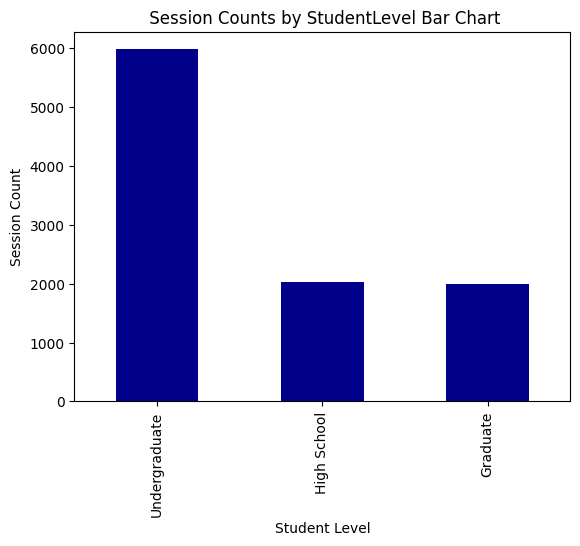

In [ ]:
#Create a bar chart of session counts by StudentLevel.

#Count the number of sessions for each StudentLevel
session_count = df['StudentLevel'].value_counts()

#create bar chart
plt.Figure(figsize=(10,6))
session_count.plot(kind='bar', color='darkblue')
plt.title(" Session Counts by StudentLevel Bar Chart")
plt.xlabel("Student Level")
plt.ylabel("Session Count")
plt.show()

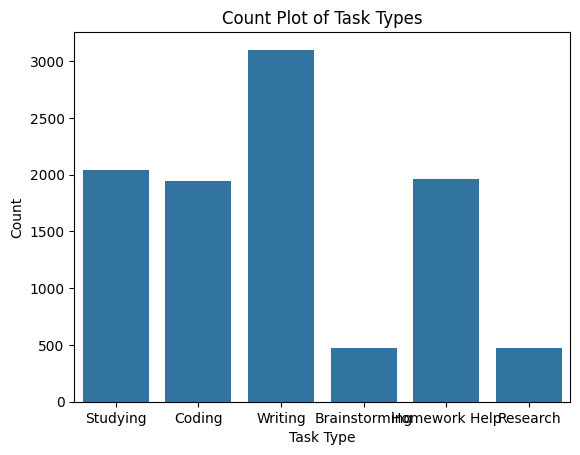

In [ ]:
#Make a countplot of TaskType using Seaborn.
plt.Figure(figsize=(10,6))
sns.countplot(data=df, x=df['TaskType'])
plt.title("Count Plot of Task Types")
plt.ylabel("Count")
plt.xlabel("Task Type")
plt.show()

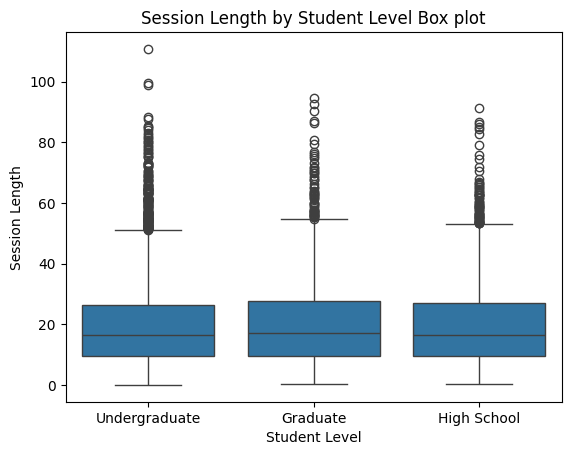

In [ ]:
#Plot a boxplot of SessionLengthMin grouped by StudentLevel.
plt.Figure(figsize=(10,6))
sns.boxplot(x='StudentLevel', y='SessionLengthMin', data =df)
plt.title("Session Length by Student Level Box plot")
plt.xlabel("Student Level")
plt.ylabel("Session Length")
plt.show()

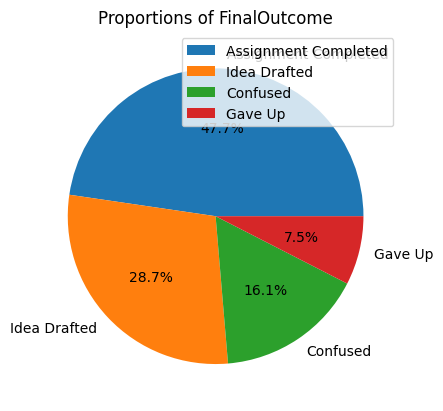

In [ ]:
#Create a pie chart showing proportions of FinalOutcome.
outcome_counts = df['FinalOutcome'].value_counts()

plt.Figure(figsize=(8,8))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%')
plt.title("Proportions of FinalOutcome")
plt.legend()
plt.show()

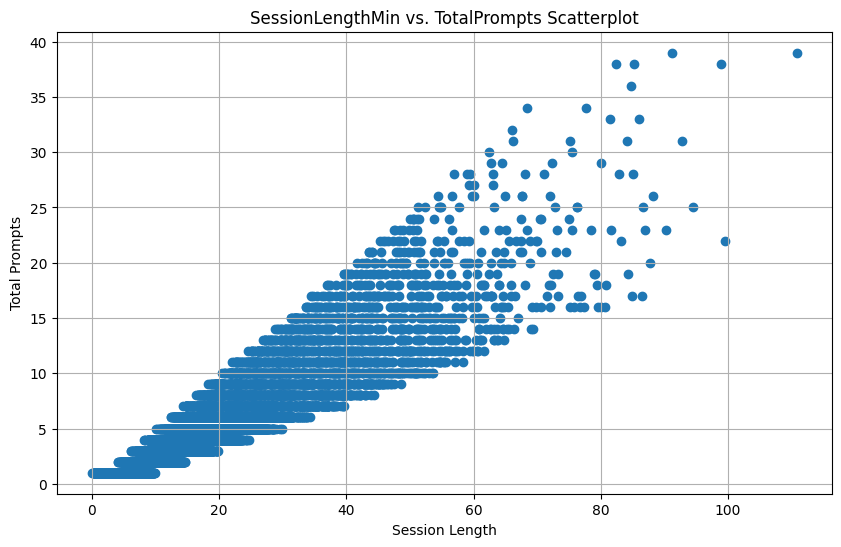

In [ ]:
#Draw a scatterplot of SessionLengthMin vs. TotalPrompts.
plt.figure(figsize=(10,6))
plt.scatter(x='SessionLengthMin', y='TotalPrompts', data=df)
plt.title("SessionLengthMin vs. TotalPrompts Scatterplot")
plt.ylabel("Total Prompts")
plt.xlabel("Session Length")
plt.grid(True)
plt.show()

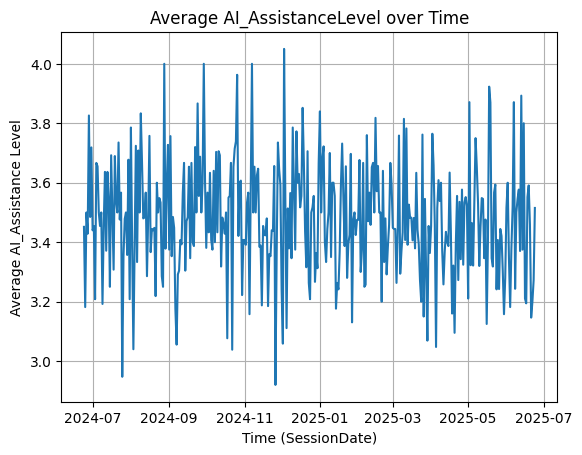

In [ ]:
#Plot a line chart of average AI_AssistanceLevel over time (SessionDate)
#change SessionDate from object to datetime fromat
df['SessionDate'] = pd.to_datetime(df['SessionDate'])

#Group by SessionDate & get AVG AssistanceLevel
avg_AssistanceLevel = df.groupby('SessionDate')['AI_AssistanceLevel'].mean().reset_index()

#plot line chart
plt.Figure(figsize=(12,8))
sns.lineplot(data=avg_AssistanceLevel, x='SessionDate', y='AI_AssistanceLevel')
plt.title("Average AI_AssistanceLevel over Time")
plt.xlabel("Time (SessionDate)")
plt.ylabel("Average AI_Assistance Level")
plt.grid()
plt.show()

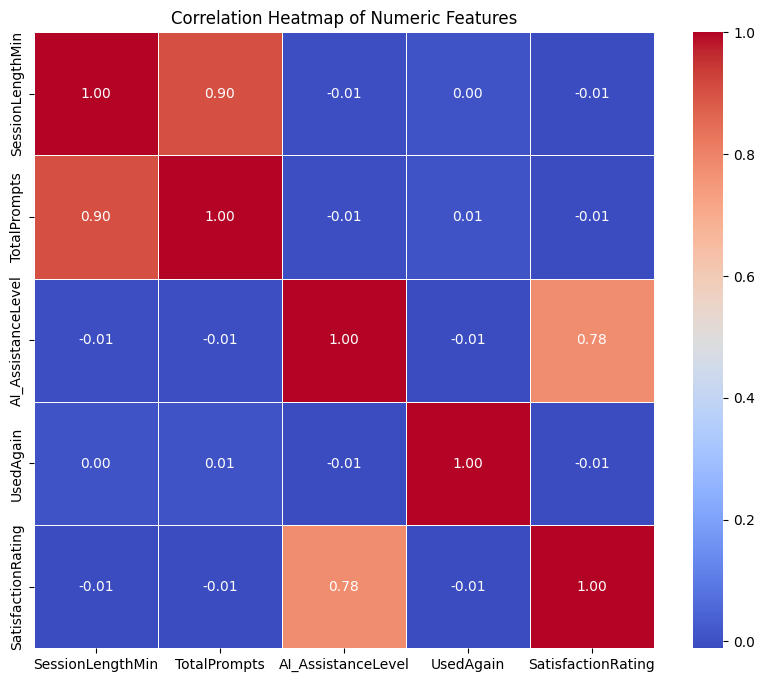

In [ ]:
#Create a heatmap of correlations among numeric features
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

#### Part C: GroupBy & Aggregations


In [ ]:
#Find the average SessionLengthMin for each TaskType
avg_SessionLength = df.groupby('TaskType')['SessionLengthMin'].mean()
avg_SessionLength


,SessionLengthMin
TaskType,
Brainstorming,21.964223
Coding,19.467659
Homework Help,19.940536
Research,20.410000
Studying,19.705917
Writing,19.705888


In [ ]:
#Which Discipline had the most sessions?
most_common_disc = df['Discipline'].mode()[0]
most_sessions = df['Discipline'].value_counts()[0]
print(f'{most_common_disc}', "has most sessions:", most_sessions)

Biology has most sessions: 1458


/tmp/ipython-input-1564066051.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  most_sessions = df['Discipline'].value_counts()[0]


In [ ]:
#Compare average AI_AssistanceLevel across StudentLevel.
avg_AI_Assistance = df.groupby('StudentLevel')['AI_AssistanceLevel'].mean()
avg_AI_Assistance

,AI_AssistanceLevel
StudentLevel,
Graduate,3.469674
High School,3.477060
Undergraduate,3.483607


In [ ]:
#Find the most common FinalOutcome for Graduate students.
#filter for Graduate students
Grad_students = df[df['StudentLevel'] == 'Graduate']

#check for most common finaloutcome in graduate students
most_comm_graduate = Grad_students['FinalOutcome'].mode()[0]
most_comm_graduate_count = Grad_students['FinalOutcome'].value_counts()[0]

#print output
print(f'{most_comm_graduate} is most common FinalOutcome: {most_comm_graduate_count}')

Assignment Completed is most common FinalOutcome: 936


/tmp/ipython-input-122845639.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  most_comm_graduate_count = Grad_students['FinalOutcome'].value_counts()[0]


In [ ]:
#Calculate the median SessionLengthMin for each FinalOutcome.
median_length = df.groupby('FinalOutcome')['SessionLengthMin'].median()
median_length

,SessionLengthMin
FinalOutcome,
Assignment Completed,16.570
Confused,16.040
Gave Up,17.290
Idea Drafted,17.085


#### Part D: Feature Engineering & Encoding


In [ ]:
#Convert SessionDate into Year, Month, and Day columns.
df['Year'] = df['SessionDate'].dt.year
df['Month'] = df['SessionDate'].dt.month
df['Day'] = df['SessionDate'].dt.day

print(df[['Year', 'Month', 'Day']])

      Year  Month  Day
0     2024     11    3
1     2024      8   25
2     2025      1   12
3     2025      5    6
4     2025      3   18
...    ...    ...  ...
9995  2024      7   20
9996  2024     11   11
9997  2024      9   11
9998  2024     10   27
9999  2025      4   16

[10000 rows x 3 columns]


In [ ]:
#Encode StudentLevel using Label Encoding.
from sklearn.preprocessing import LabelEncoder

#initialize label Encoder
label_encoder = LabelEncoder()
df['StudentLevel_encoded'] = label_encoder.fit_transform(df['StudentLevel'])
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,StudentLevel_encoded
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3,2
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25,2
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12,2
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6,2
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18,2


In [ ]:
#Apply One-Hot Encoding to TaskType
from sklearn.preprocessing import OneHotEncoder

df_encoded = pd.get_dummies(df, columns=['TaskType'], prefix='TaskType')
df_encoded.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,StudentLevel_encoded,TaskType_Brainstorming,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,2,Assignment Completed,True,1.0,2024,11,3,2,False,False,False,False,True,False
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,3,Assignment Completed,True,2.0,2024,8,25,2,False,False,False,False,True,False
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,3,Assignment Completed,True,3.3,2025,1,12,2,False,True,False,False,False,False
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,3,Assignment Completed,True,3.5,2025,5,6,2,False,True,False,False,False,False
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,3,Assignment Completed,True,2.9,2025,3,18,2,False,False,False,False,False,True


In [ ]:
#Create a new feature: PromptsPerMinute = TotalPrompts / SessionLengthMin.
df_encoded['PromptsPerMinute'] = df['TotalPrompts'] / df['SessionLengthMin']
df_encoded.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,...,Month,Day,StudentLevel_encoded,TaskType_Brainstorming,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing,PromptsPerMinute
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,2,Assignment Completed,True,1.0,...,11,3,2,False,False,False,False,True,False,0.352564
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,3,Assignment Completed,True,2.0,...,8,25,2,False,False,False,False,True,False,0.458365
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,3,Assignment Completed,True,3.3,...,1,12,2,False,True,False,False,False,False,0.260146
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,3,Assignment Completed,True,3.5,...,5,6,2,False,True,False,False,False,False,0.270270
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,3,Assignment Completed,True,2.9,...,3,18,2,False,False,False,False,False,True,0.320057


In [ ]:
# Bin SessionLengthMin into categories: Short, Medium, Long
#define bins and labels
bins = [0,
        df['SessionLengthMin'].quantile(0.33),
        df['SessionLengthMin'].quantile(0.67),
        df['SessionLengthMin'].max()]

labels = ['Short', 'Medium', 'Long']
#bin SessionLengthMin in to categories
df_encoded['SessionLengthCategory'] = pd.cut(df['SessionLengthMin'], bins=bins, labels=labels, right=True)
df_encoded['SessionLengthCategory'].value_counts()

,count
SessionLengthCategory,
Medium,3402
Short,3301
Long,3297


####  Part E: Machine Learning (Classification Models)


In [ ]:
#Predict FinalOutcome using a Decision Tree Classifier.
#define target and features
y = df_encoded['FinalOutcome']
X = df_encoded.drop(columns=['FinalOutcome', 'SessionID', 'SessionDate', 'StudentLevel'])

#check for categorical columns for one_hot encoding
categ_columns = ['Discipline', 'SessionLengthCategory']
X = pd.get_dummies(X, columns=categ_columns, dtype=int)

#split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#initialise and train decision tree clasifier
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train, y_train)
#predict values
y_pred = dtree_model.predict(X_test)
#evaluate model
print("Classification Report:",classification_report(y_test, y_pred))


Classification Report:                       precision    recall  f1-score   support

Assignment Completed       0.48      0.47      0.47       930
            Confused       0.24      0.22      0.23       349
             Gave Up       0.11      0.12      0.11       170
        Idea Drafted       0.29      0.30      0.30       551

            accuracy                           0.35      2000
           macro avg       0.28      0.28      0.28      2000
        weighted avg       0.35      0.35      0.35      2000



In [ ]:
#Predict UsedAgain using Logistic Regression.
#define target and features
target = 'UsedAgain'
features = df_encoded.drop(columns=['SessionID', 'SessionDate', 'StudentLevel_encoded', target])
# Identify categorical columns for one-hot encoding
categorical_cols = ['StudentLevel', 'Discipline', 'SessionLengthCategory', 'FinalOutcome']
features = pd.get_dummies(features, columns=categorical_cols, dtype=int)

X = features
y = df_encoded[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Initialize model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

#predict values
y_Pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)  # predicted probabilities

#Evaluate model
print("Predictions:", y_Pred)
print("Predicted Probabilities:\n", y_prob)
print("Accuracy:", accuracy_score(y_test, y_Pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_Pred))
print("\nClassification Report:\n", classification_report(y_test, y_Pred))

Predictions: [ True  True  True ...  True  True False]
Predicted Probabilities:
 [[0.22642149 0.77357851]
 [0.24436375 0.75563625]
 [0.19430022 0.80569978]
 ...
 [0.42639986 0.57360014]
 [0.15949564 0.84050436]
 [0.5201099  0.4798901 ]]
Accuracy: 0.7375

Confusion Matrix:
 [[ 244  343]
 [ 182 1231]]

Classification Report:
               precision    recall  f1-score   support

       False       0.57      0.42      0.48       587
        True       0.78      0.87      0.82      1413

    accuracy                           0.74      2000
   macro avg       0.68      0.64      0.65      2000
weighted avg       0.72      0.74      0.72      2000



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Train a Random Forest Classifier to predict FinalOutcome.
# Define target variable and features
target = 'FinalOutcome'
features = df_encoded.drop(columns=['SessionID', 'SessionDate', 'StudentLevel_encoded', target])

# Identify categorical columns for one-hot encoding
categorical_cols = ['StudentLevel', 'Discipline', 'SessionLengthCategory']

# Perform one-hot encoding
features = pd.get_dummies(features, columns=categorical_cols, dtype=int)

# Separate target and features
X = features
y = df_encoded[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                      precision    recall  f1-score   support

Assignment Completed       0.52      0.76      0.62       953
            Confused       0.36      0.24      0.29       323
             Gave Up       0.13      0.02      0.03       151
        Idea Drafted       0.37      0.24      0.30       573

            accuracy                           0.47      2000
           macro avg       0.35      0.31      0.31      2000
        weighted avg       0.42      0.47      0.43      2000



In [ ]:
#Use KNN (K-Nearest Neighbors) to classify UsedAgain.
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#convert boolean 'UsedAgain' to integer
df_encoded['UsedAgain'] = df_encoded['UsedAgain'].astype(int)

#define target variable and features
target = 'UsedAgain'
features = df_encoded.drop(columns=['SessionID', 'SessionDate', 'StudentLevel_encoded', target])

#identify categorical columns for one-hot encoding
categorical_cols = ['StudentLevel', 'Discipline', 'FinalOutcome', 'SessionLengthCategory']
# Perform one-hot encoding
features = pd.get_dummies(features, columns=categorical_cols, dtype=int)

# Separate target and features
X = features
y = df_encoded[target]

# Split the data to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numerical columns for scaling
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Scale numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict
y_pred = knn_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.27      0.34       587
           1       0.74      0.88      0.81      1413

    accuracy                           0.70      2000
   macro avg       0.61      0.57      0.58      2000
weighted avg       0.67      0.70      0.67      2000



In [ ]:
#Train a Naive Bayes Classifier to predict FinalOutcome.
from sklearn.naive_bayes import GaussianNB

# Define target variable and features
target = 'FinalOutcome'
features = df_encoded.drop(columns=['SessionID', 'SessionDate', 'StudentLevel_encoded', target])

#identify categorical columns for one-hot encoding
categorical_cols = ['StudentLevel', 'Discipline', 'SessionLengthCategory']
# Perform one-hot encoding
features = pd.get_dummies(features, columns=categorical_cols, dtype=int)

# Separate target and features
X = features
y = df_encoded[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                      precision    recall  f1-score   support

Assignment Completed       0.52      0.86      0.65       953
            Confused       0.39      0.21      0.27       323
             Gave Up       0.18      0.14      0.16       151
        Idea Drafted       0.47      0.12      0.20       573

            accuracy                           0.49      2000
           macro avg       0.39      0.33      0.32      2000
        weighted avg       0.46      0.49      0.42      2000



In [ ]:
#Build a Gradient Boosting Classifier for UsedAgain.
from sklearn.ensemble import GradientBoostingClassifier


#convert boolean `UsedAgain` to integer
df_encoded['UsedAgain'] = df_encoded['UsedAgain'].astype(int)

# Define target variable and features
target = 'UsedAgain'
features = df_encoded.drop(columns=['SessionID', 'SessionDate', 'StudentLevel_encoded', target])

# Identify categorical columns for one-hot encoding
categorical_cols = ['StudentLevel', 'Discipline', 'FinalOutcome', 'SessionLengthCategory']

# Perform one-hot encoding
features = pd.get_dummies(features, columns=categorical_cols, dtype=int)

# Separate target and features
X = features
y = df_encoded[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
print("Classification Report:", classification_report(y_test, y_pred))


Classification Report:               precision    recall  f1-score   support

           0       0.57      0.44      0.50       587
           1       0.79      0.86      0.82      1413

    accuracy                           0.74      2000
   macro avg       0.68      0.65      0.66      2000
weighted avg       0.72      0.74      0.73      2000



In [ ]:
#Apply an XGBoost Classifier to predict FinalOutcome.

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

#encode the target variable if it's categorical
le = LabelEncoder()
df_encoded['FinalOutcome_encoded'] = le.fit_transform(df['FinalOutcome'])

#define target and features
target = 'FinalOutcome_encoded'
features = df_encoded.drop(columns=['SessionID', 'SessionDate', 'Year', 'Month', 'Day', target])

# Identify categorical columns for one-hot encoding
categorical_cols = ['StudentLevel', 'Discipline', 'FinalOutcome', 'SessionLengthCategory']

# Perform one-hot encoding
features = pd.get_dummies(features, columns=categorical_cols, dtype=int)

# Define features and target
X = features
y = df_encoded[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("xgb Classification Report:", classification_report(y_test, y_pred_xgb, target_names=le.classes_))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:17:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


xgb Classification Report:                       precision    recall  f1-score   support

Assignment Completed       1.00      1.00      1.00       953
            Confused       1.00      1.00      1.00       323
             Gave Up       1.00      1.00      1.00       151
        Idea Drafted       1.00      1.00      1.00       573

            accuracy                           1.00      2000
           macro avg       1.00      1.00      1.00      2000
        weighted avg       1.00      1.00      1.00      2000



In [ ]:
#Split the dataset into 80% training and 20% testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
#Evaluate one model using accuracy and a confusion matrix (Logistic model)
print("Accuracy:", accuracy_score(y_test, y_Pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_Pred))

Accuracy: 0.2365

Confusion Matrix:
 [[220 733   0   0]
 [ 70 253   0   0]
 [ 37 114   0   0]
 [ 99 474   0   0]]


In [ ]:
#Generate a classification report (precision, recall, f1-score).
print("\nClassification Report:\n", classification_report(y_test, y_Pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.23      0.32       953
           1       0.16      0.78      0.27       323
           2       0.00      0.00      0.00       151
           3       0.00      0.00      0.00       573

    accuracy                           0.24      2000
   macro avg       0.17      0.25      0.15      2000
weighted avg       0.27      0.24      0.20      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Part F: Model Evaluation & Hyperparameter Tuning

In [ ]:
#Perform cross-validation for Logistic Regression.
from sklearn.model_selection import cross_val_score
#set no. of folds
n_splits = 5
#use accuracy as scoring mertics
cv_scores = cross_val_score(log_model, X, y, cv=n_splits, scoring='accuracy')

#print the scores for each fold and men/std for the scores
print(f"Cross-validation scores for each of the {n_splits} folds:", cv_scores)
print("Average cross-validation score (Accuracy):", {np.mean(cv_scores)})
print("Standard Deviation of Scores:", {np.std(cv_scores)})

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores for each of the 5 folds: [1. 1. 1. 1. 1.]
Average cross-validation score (Accuracy): {np.float64(1.0)}
Standard Deviation of Scores: {np.float64(0.0)}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Use GridSearchCV to tune hyperparameters of a Decision Tree.
from sklearn.model_selection import train_test_split, GridSearchCV
#Define the hyperparameters to tune and the values to test
param_grid = {
    'max_depth': [3, 5, 7, 10, None], # Max depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']}
#initialize GridSearchCV
grid_search = GridSearchCV(estimator=dtree_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

#Fit the grid search to the training data - find the best combination of parameters.
grid_search.fit(X_train, y_train)

# Use the best model found by the search to make predictions on the test set
best_dtree_model = grid_search.best_estimator_
y_pred_tuned = best_dtree_model.predict(X_test)

# Evaluate the performance of the tuned model
print("Best Tuned Model Classification Report:", classification_report(y_test, y_pred_tuned))



Best Tuned Model Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       953
           1       1.00      1.00      1.00       323
           2       1.00      1.00      1.00       151
           3       1.00      1.00      1.00       573

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
#Tune a Random Forest Classifier (n_estimators, max_depth).
#define the parameter grid for n_estimators and max_depth
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}

#Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data to perform search
grid_search.fit(X_train, y_train)

#print the best parameters and the best score found
print("Best Parameters found by GridSearchCV:", grid_search.best_params_)
print(f"Best Cross-Validation Score (Accuracy):, {grid_search.best_score_:.4f}")

# Get the best estimator (the best tuned model)
best_rf_model = grid_search.best_estimator_

# Make predictions using the tuned model
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluate the performance of the tuned model
print("Best Tuned Model Classification Report:", classification_report(y_test, y_pred_tuned))


Best Parameters found by GridSearchCV: {'max_depth': 10, 'n_estimators': 50}
Best Cross-Validation Score (Accuracy):, 1.0000
Best Tuned Model Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       953
           1       1.00      1.00      1.00       323
           2       1.00      1.00      1.00       151
           3       1.00      1.00      1.00       573

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
#Compare Logistic Regression, Decision Tree, Random Forest, Naive Bayes, KNN, Gradient Boosting, and XGBoost for predicting UsedAgain.

# Define target and features
target = 'UsedAgain'
features = df_encoded.drop(columns=['SessionID', 'SessionDate', 'StudentLevel_encoded', target])

# Identify categorical columns for one-hot encoding
categorical_cols = ['StudentLevel', 'Discipline', 'SessionLengthCategory', 'FinalOutcome']
features = pd.get_dummies(features, columns=categorical_cols, dtype=int)

X = features
y = df_encoded[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features (Logistic Regression, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Dictionary to store results
results = {}

# Compare models
for name, model in models.items():
    print(f"\nTraining {name}")

    # Use scaled data for models that benefit from scaling
    if name in ['Logistic Regression', 'KNN', 'Naive Bayes']:
        X_tr = X_train_scaled
        X_te = X_test_scaled
    else:
        X_tr = X_train
        X_te = X_test

    # Cross-validation
    cv_scores = cross_val_score(model, X_tr, y_train, cv=5, scoring='accuracy')

    # Train and predict
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    y_prob = model.predict_proba(X_te)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
    }

    print(f"Accuracy: {accuracy:.3f}")

# Create results dataframe
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('Accuracy', ascending=False)

print("\n" + "="*80)
print("MODEL COMPARISON RESULTS")
print("="*80)
print(results_df.round(3))


Training Logistic Regression
Accuracy: 0.743

Training Decision Tree
Accuracy: 0.632

Training Random Forest
Accuracy: 0.737

Training Naive Bayes
Accuracy: 0.721

Training KNN
Accuracy: 0.707

Training Gradient Boosting
Accuracy: 0.739

Training XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:39:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:39:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:39:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:39:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:39:33] WARNING: /w

Accuracy: 0.721

MODEL COMPARISON RESULTS
                     Accuracy  Precision  Recall  F1 Score  ROC AUC
Logistic Regression     0.742      0.795   0.857     0.825    0.669
Gradient Boosting       0.739      0.788   0.863     0.824    0.664
Random Forest           0.737      0.777   0.881     0.826    0.667
XGBoost                 0.721      0.761   0.882     0.817    0.639
Naive Bayes             0.721      0.793   0.819     0.806    0.661
KNN                     0.707      0.759   0.858     0.805    0.624
Decision Tree           0.632      0.741   0.737     0.739    0.559
